# Data Analysis Project : Bike Sharing Dataset
- Name          : Anas Satria Lombu
- Email         : anassatria1010@gmail.com
- Dicoding ID   : anassatria

# Business Problem Question

1. When are the busy and quite times of the year for bike sharing used?
2. What is the overall trend og bike users throughout the year?
3. How does bikr users differ between weekdays and weekends?
4. What is the hourly trend of users during the bike share operation?
5. How does weather condition impact the usage the bike-sharing across different seasons for registered and casual users?



In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# Collecting Data

In [2]:
# load data function
def load_data():
    data = pd.read_csv('data\hour.csv')
    return data

In [3]:
data = load_data()

data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


# Assessing Data 

In [5]:
# show information of data
info_df = data.info()
info_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# check missing values of data
check_df = data.isna().sum()

# show the missing values
print('Check missing values for each column :')
print(check_df)

Check missing values for each column :
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
# check duplicated data
duplicated_data = data.duplicated().sum()

# show number of duplicated data
print('Number of duplicated data :', duplicated_data)

Number of duplicated data : 0


In [8]:
# numerical statistic of data
numerical_data = data.describe()

# show describtion of data
numerical_data

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# Preprocessing Data

In [9]:
# preprocessing function
def prepocessing(dataframe):
  dataframe['dteday'] = pd.to_datetime(dataframe['dteday'])
  
  dataframe['month'] = dataframe['dteday'].dt.month_name()
  dataframe['day'] = dataframe['dteday'].dt.day_name()
  
  dataframe['season'] = dataframe['season'].replace([1, 2, 3, 4], ['Springer', 'Summer', 'Fall', 'Winter'])
  dataframe['yr'] = dataframe['yr'].replace([0, 1], [2011, 2012])
  dataframe['workingday'] = dataframe['workingday'].replace([0, 1],['No', 'Yes'])
  dataframe['weathersit'] = dataframe['weathersit'].replace([1, 2, 3, 4], ['Clear', 'Mist + Cloudy', 'Light Snow', 'Heavy Rain + Ice Palltes'])
  dataframe['temp'] = dataframe['temp']*41
  dataframe['atemp'] = dataframe['atemp']*50
  dataframe['hum'] = dataframe['hum']*100
  dataframe['windspeed'] = dataframe['windspeed']*67
  
  return dataframe

In [10]:
# result of preprocessing data
df = prepocessing(data)

# show the result of preprocessing data
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,day
0,1,2011-01-01,Springer,2011,1,0,0,6,No,Clear,9.84,14.395,81.0,0.0000,3,13,16,January,Saturday
1,2,2011-01-01,Springer,2011,1,1,0,6,No,Clear,9.02,13.635,80.0,0.0000,8,32,40,January,Saturday
2,3,2011-01-01,Springer,2011,1,2,0,6,No,Clear,9.02,13.635,80.0,0.0000,5,27,32,January,Saturday
3,4,2011-01-01,Springer,2011,1,3,0,6,No,Clear,9.84,14.395,75.0,0.0000,3,10,13,January,Saturday
4,5,2011-01-01,Springer,2011,1,4,0,6,No,Clear,9.84,14.395,75.0,0.0000,0,1,1,January,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Springer,2012,12,19,0,1,Yes,Mist + Cloudy,10.66,12.880,60.0,11.0014,11,108,119,December,Monday
17375,17376,2012-12-31,Springer,2012,12,20,0,1,Yes,Mist + Cloudy,10.66,12.880,60.0,11.0014,8,81,89,December,Monday
17376,17377,2012-12-31,Springer,2012,12,21,0,1,Yes,Clear,10.66,12.880,60.0,11.0014,7,83,90,December,Monday
17377,17378,2012-12-31,Springer,2012,12,22,0,1,Yes,Clear,10.66,13.635,56.0,8.9981,13,48,61,December,Monday


In [11]:
# describe categorical data
describe_categorical_data = df.describe(include='O')

# show describe categorical data
describe_categorical_data

,season,workingday,weathersit,month,day
count,17379,17379,17379,17379,17379
unique,4,2,4,12,7
top,Fall,Yes,Clear,July,Saturday
freq,4496,11865,11413,1488,2512


# Exploratory Data Analysis (EDA)

In [12]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols = num_cols[6:]
cat_cols = df.select_dtypes(include='O').columns.tolist()

print('Numerical columns : ')
print(num_cols)
print()
print('Cat columns : ')
print(cat_cols)



Numerical columns : 
['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

Cat columns : 
['season', 'workingday', 'weathersit', 'month', 'day']


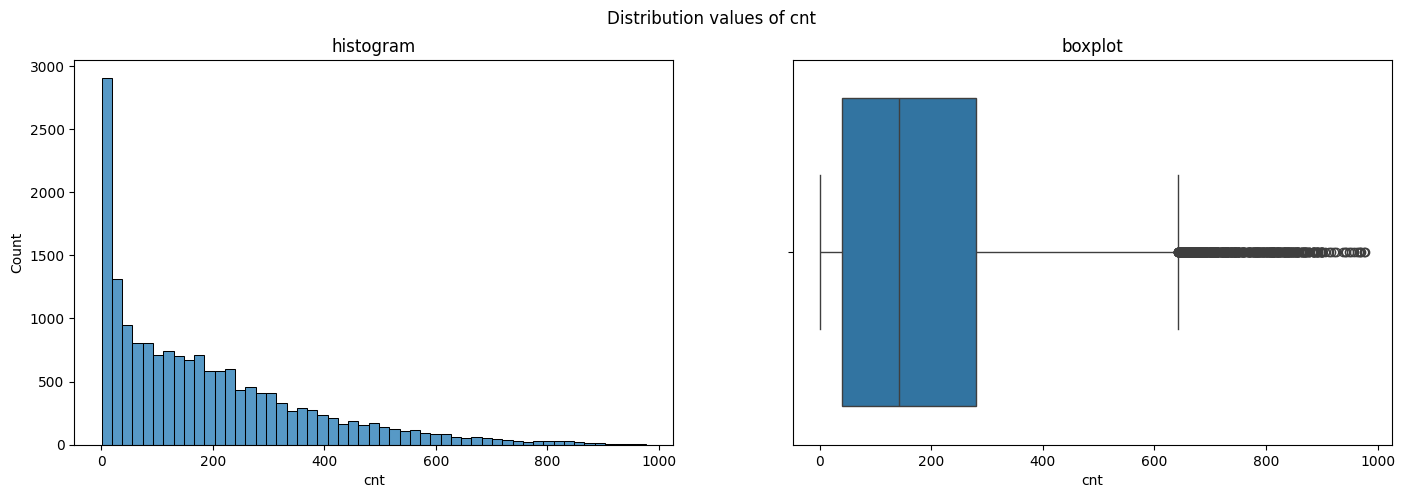

In [13]:
# cnt distribution chart
plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='cnt').set_title('histogram')
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='cnt').set_title('boxplot')
plt.suptitle('Distribution values of cnt')
plt.show()


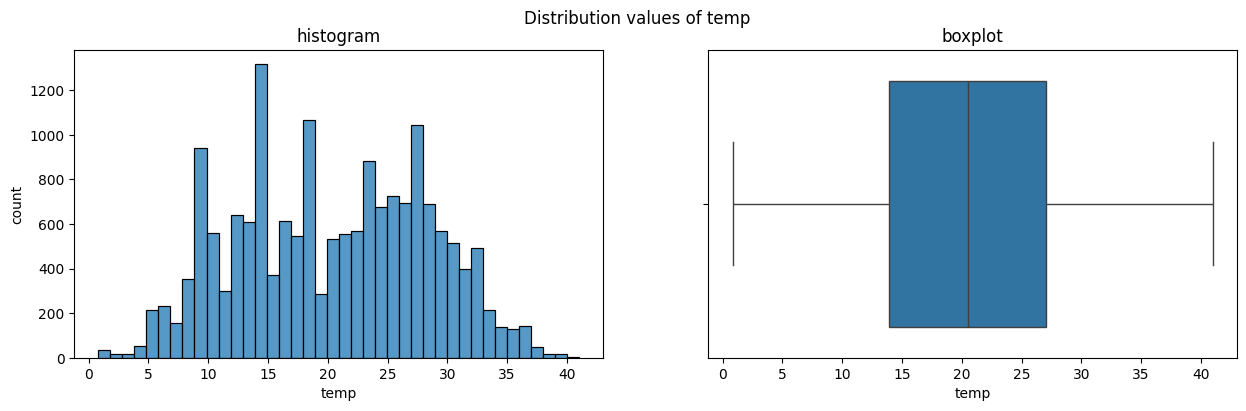

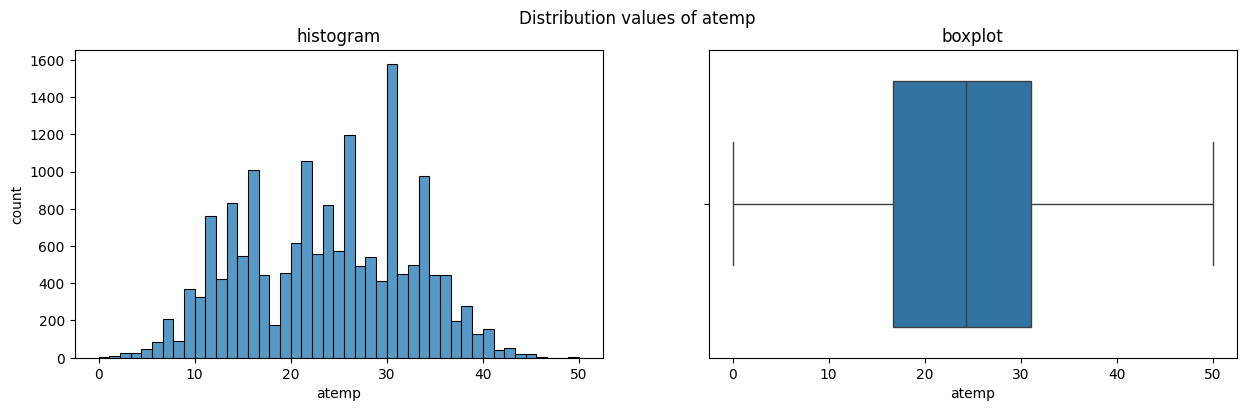

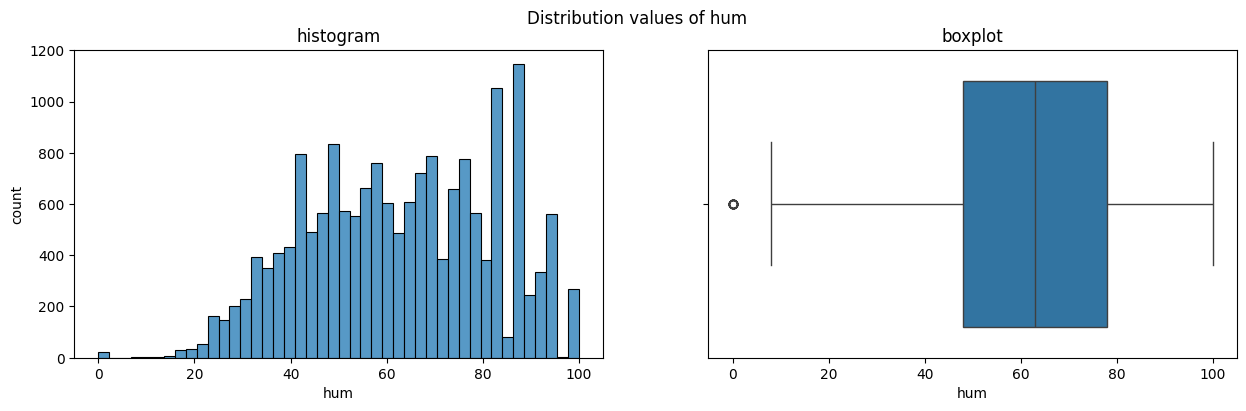

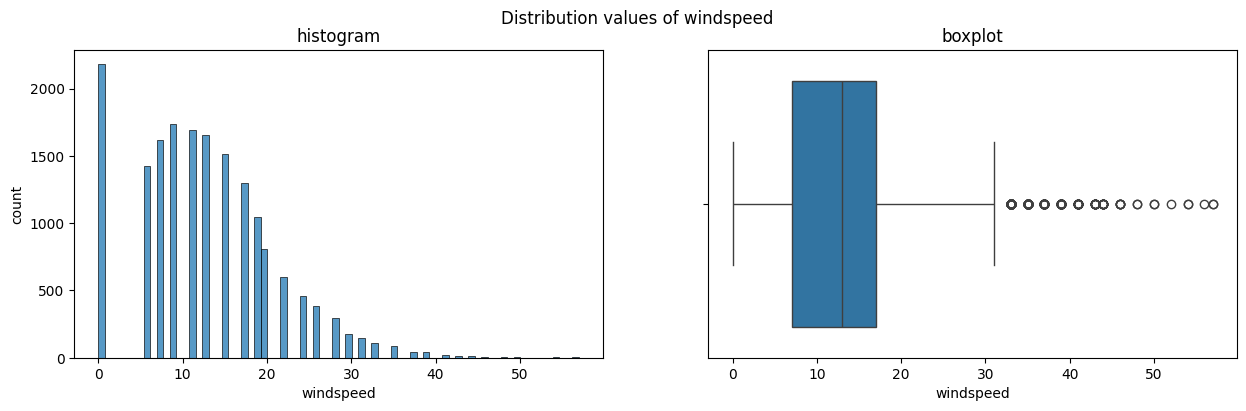

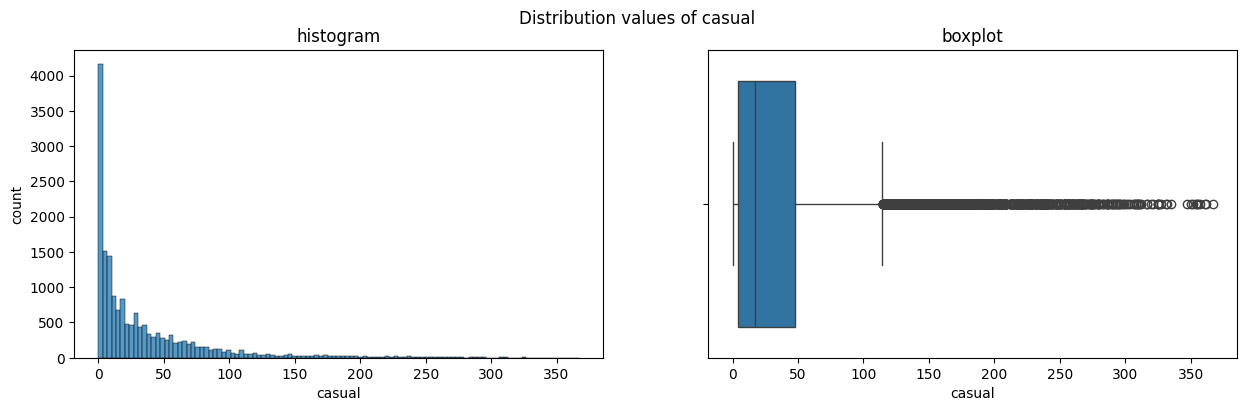

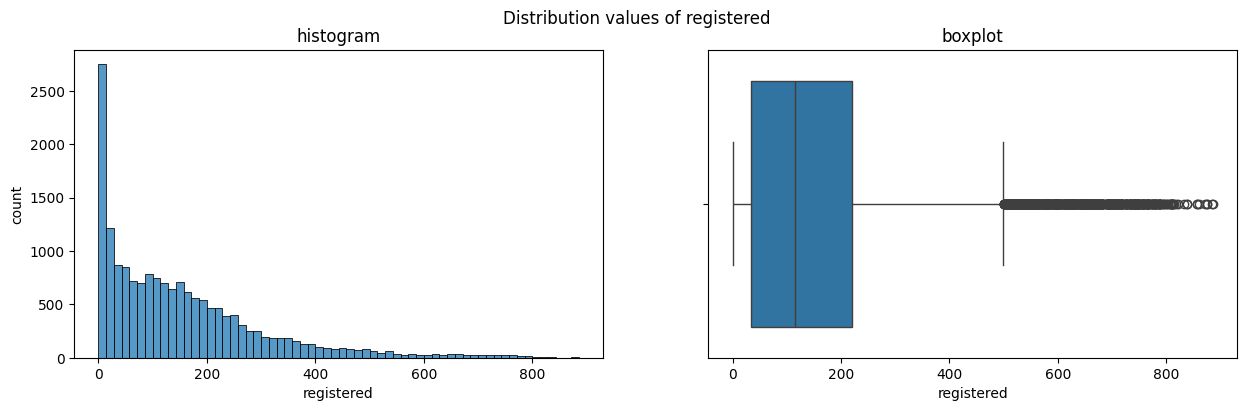

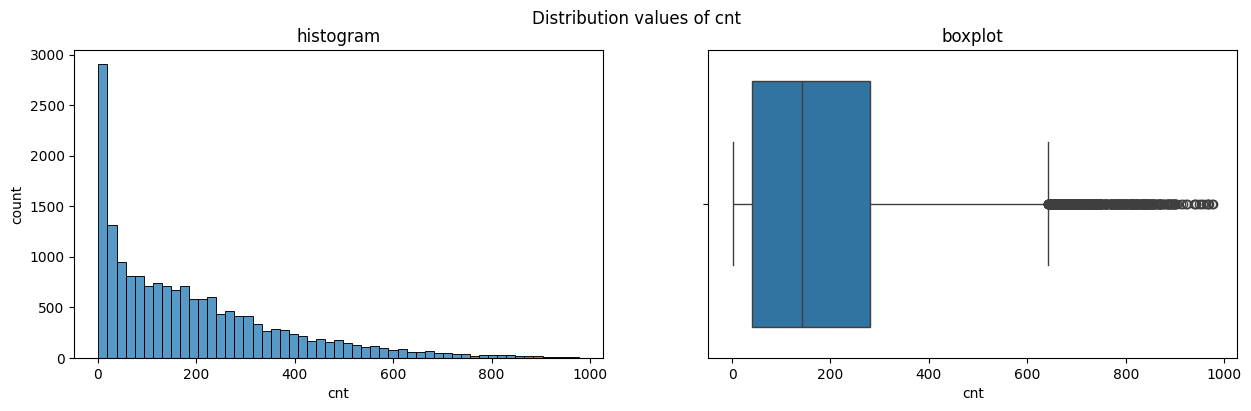

In [14]:
# visualize distribution values from numerical columns
for col in num_cols:
  plt.figure(figsize=(15,4))
  plt.suptitle(f'Distribution values of {col}')
  plt.subplot(1, 2, 1)
  sns.histplot(data=data[col]).set_title('histogram')
  plt.ylabel('count')
  plt.subplot(1, 2, 2)
  sns.boxplot(x=df[col]).set_title('boxplot')
  plt.show()

- Based on the numerical column, there are outlier values in the name columns :
1. hum
2. windspeed
3. casual
4. registered
5. cnt

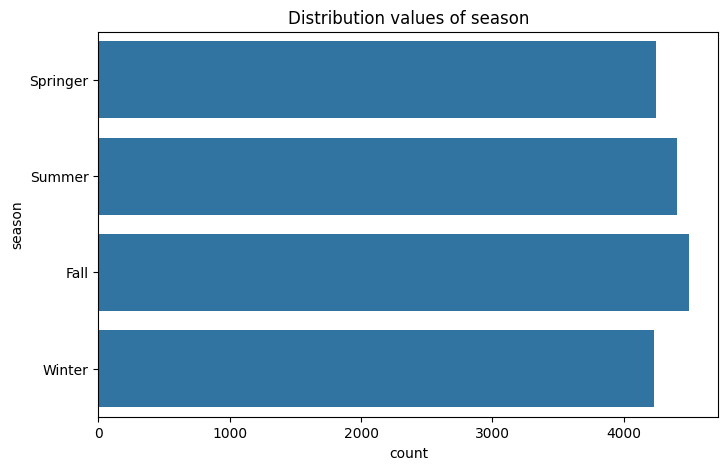

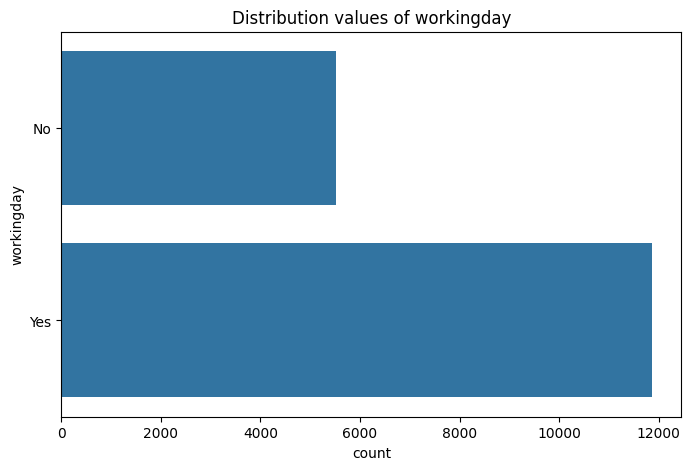

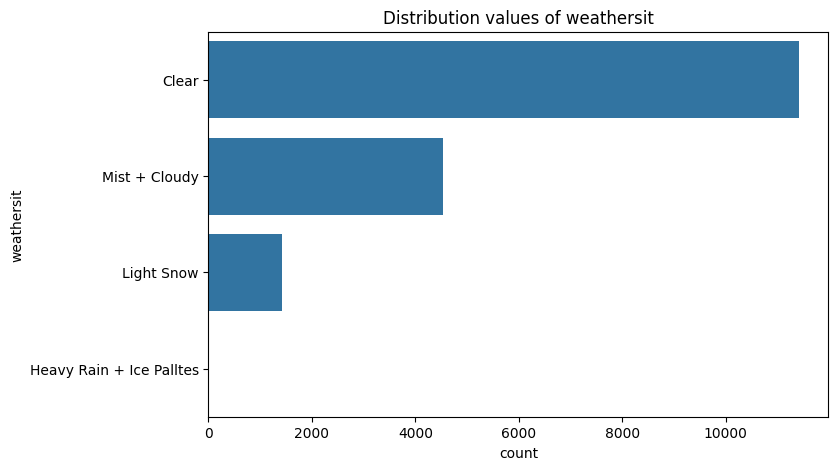

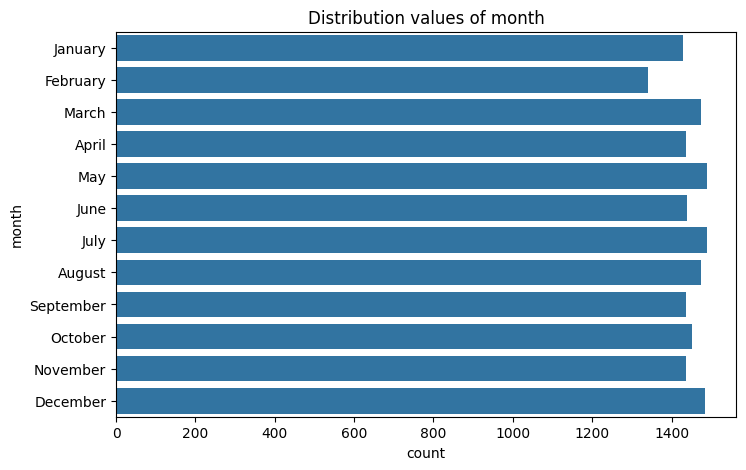

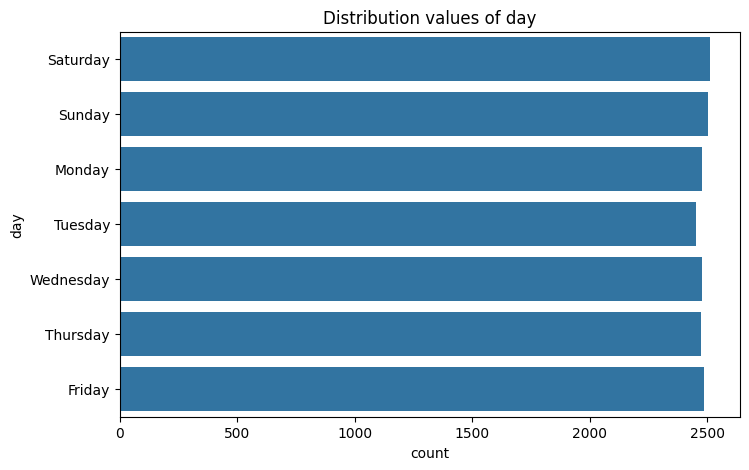

In [15]:
for col in cat_cols:
  plt.figure(figsize=(8, 5))
  sns.countplot(data=data[col]).set_title(f'Distribution values of {col}')
  plt.show()

# Analyze data

In [16]:
# create daily bike share function
def create_daily_bike_share(df):
    daily_riders_df = df.resample(rule='D', on='dteday').agg({
        'casual': 'sum',
        'registered': 'sum', 
        'cnt': 'sum'
    })
    
    daily_riders_df = daily_riders_df.reset_index()
    
    return daily_riders_df

In [17]:
# initialization daily_df 
daily_df = create_daily_bike_share(df)

# show the daily_df
daily_df

,dteday,casual,registered,cnt
0,2011-01-01,331,654,985
1,2011-01-02,131,670,801
2,2011-01-03,120,1229,1349
3,2011-01-04,108,1454,1562
4,2011-01-05,82,1518,1600
...,...,...,...,...
726,2012-12-27,247,1867,2114
727,2012-12-28,644,2451,3095
728,2012-12-29,159,1182,1341
729,2012-12-30,364,1432,1796


In [18]:
# create monthly bike share function
def create_monthly_bike_share(df):
    month_order = df['month'].unique().tolist()
    bike_share_monthly = df.groupby('month').agg({
        'casual': 'sum',
        'registered': 'sum',
        'cnt': 'sum'
    })
    
    bike_share_monthly = bike_share_monthly.reindex(month_order).reset_index()

    return bike_share_monthly

In [19]:
# initialization monthly_df
monthly_df = create_monthly_bike_share(df)

# show the monthly_df
monthly_df

,month,casual,registered,cnt
0,January,12042,122891,134933
1,February,14963,136389,151352
2,March,44444,184476,228920
3,April,60802,208292,269094
4,May,75285,256401,331686
5,June,73906,272436,346342
6,July,78157,266791,344948
7,August,72039,279155,351194
8,September,70323,275668,345991
9,October,59760,262592,322352


In [20]:
# create bike share days function
def create_bike_share_days(df):
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    bike_share_days = df.groupby('day').agg({
        'casual': 'sum',
        'registered': 'sum',
        'cnt': 'sum'
    })
    
    bike_share_days = bike_share_days.reindex(day_order).reset_index()
    
    return bike_share_days

In [21]:
# initialization day_of_df
days_of_the_week_df = create_bike_share_days(df)

# show the days_of_df
days_of_the_week_df

,day,casual,registered,cnt
0,Monday,70784,384719,455503
1,Tuesday,57843,411266,469109
2,Wednesday,57319,415729,473048
3,Thursday,61460,423935,485395
4,Friday,78238,409552,487790
5,Saturday,153852,323955,477807
6,Sunday,140521,303506,444027


In [22]:
# create houdly bike share function
def create_hourly_bike_share_(df):
    hourly_bike_share = df.groupby('hr').agg({
        'casual': 'sum',
        'registered': 'sum',
        'cnt': 'sum'
    })
    
    hourly_bike_share = hourly_bike_share.reset_index()
    
    return hourly_bike_share

In [23]:
# initialization hourly_df
hourly_df = create_hourly_bike_share_(df)

# show the hourly_df
hourly_df

,hr,casual,registered,cnt
0,0,7375,31755,39130
1,1,4709,19455,24164
2,2,3412,12940,16352
3,3,1893,6281,8174
4,4,874,3554,4428
5,5,1012,13249,14261
6,6,3017,52115,55132
7,7,8037,146134,154171
8,8,15761,245240,261001
9,9,22458,136980,159438


In [24]:
# create bike share weathersit
def create_bike_share_weathersit(df):
    weathersit_by_season = df.groupby(['weathersit', 'season']).agg({
        'casual': 'sum', 
        'registered': 'sum',
        'cnt': 'sum'
    })
    
    weathersit_by_season = weathersit_by_season.reset_index()
    
    return weathersit_by_season

In [25]:
# initialization weathersit_by_season_df
weathersit_by_season_df = create_bike_share_weathersit(df)

weathersit_by_season_df

,weathersit,season,casual,registered,cnt
0,Clear,Fall,174014,627927,801941
1,Clear,Springer,44462,280816,325278
2,Clear,Summer,151197,513266,664463
3,Clear,Winter,93072,453419,546491
4,Heavy Rain + Ice Palltes,Springer,8,215,223
5,Light Snow,Fall,9727,36529,46256
6,Light Snow,Springer,1392,20250,21642
7,Light Snow,Summer,7413,39350,46763
8,Light Snow,Winter,4251,39419,43670
9,Mist + Cloudy,Fall,42350,170582,212932


# Visualize Data

In [26]:
# Visualization chart 1
chart1 = px.area(daily_df, x='dteday', y=['casual', 'registered','cnt'], labels={'variable': 'user', 'dteday': 'datetime', 'value': 'total'})
chart1.update_layout(
  title={
    'text': 'Bike Share Trend of Users',
    'x': 0.5,
    'xanchor': 'center'
  },
  xaxis_title='datetime',
  yaxis_title='total',
  legend_traceorder='reversed',
  hovermode='x unified'
)

chart1.show()

In [27]:
# Visualization chart 2
monthly_order = monthly_df['month'].unique().tolist()
chart2 = px.bar(monthly_df, x=['casual', 'registered'], y='month', category_orders={'month': monthly_order}, labels={'variable': 'user', 'value': 'total'}, text_auto=True)
chart2.update_layout(
  title={
    'text': 'Monthly Trend of Users',
    'x': 0.55,
    'xanchor': 'center'
  },
  legend={
    'orientation': 'h',
    'x': 0.5,
    'y': 1.09,
    'xanchor': 'center'
  },
  legend_title=None,
  xaxis_title='total'
)

In [28]:
# Visualization chart 3
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
chart3 = px.bar(days_of_the_week_df, x=['casual', 'registered'], y='day', category_orders={'day': day_order}, labels={'variable': 'user', 'value': 'total'}, text_auto=True)
chart3.update_layout(
  title={
    'text': 'Day of The Week Trend of Users',
    'x': 0.55,
    'xanchor': 'center'
  },
  legend={
    'orientation': 'h',
    'x': 0.5,
    'y': 1.09,
    'xanchor': 'center'
  },
  legend_title=None,
  xaxis_title='total'
)

In [29]:
# Visualization chart 4
chart4 = px.line(hourly_df, x='hr', y=['casual', 'registered'], labels={'variable': 'user', 'hr': 'hour', 'value': 'total'}, markers=True)
chart4.update_layout(
  title={
    'text': 'Hourly Trend of Users',
    'x': 0.47,
    'xanchor': 'center'
  },
  xaxis_title='hour',
  yaxis_title='total',
  legend_traceorder='reversed',
  hovermode='x unified'
)

In [30]:
# Visualization chart 5
chart5 = px.bar(weathersit_by_season_df, x='weathersit', y=['casual','registered'], facet_col='season', category_orders={'weathersit': ['Partly Cloudy', 'Cloudy with Mist and Haze', 'Light Participation', 'Severe Weather']}, labels={'variable': 'user', 'value': 'total'}, barmode='group', text_auto=True)
chart5.update_traces(textposition='outside')
chart5.update_layout(
  title={
    'text': 'Season Trend of Users',
    'x': 0.5,
    'xanchor': 'center'
  },
  xaxis_title='weathersit',
  yaxis_title='total',
  legend_traceorder='reversed',
)